In [12]:
import warnings; 
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [13]:
!pip install pystan
!pip install fbprophet

In [14]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [15]:
df = pd.read_csv('dataset.csv')

In [16]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [17]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [18]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


# 2. Train Model

In [19]:
mod = Prophet(interval_width=0.95, daily_seasonality=True)
model = mod.fit(df)

# 3. Forecast Away

In [20]:
future = mod.make_future_dataframe(periods=100,freq='D')
forecast = mod.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,782.457355,4024.352891,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,785.611698,3945.390943,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,831.764977,3872.750323,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,847.612698,4077.681323,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,853.750945,3940.567876,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


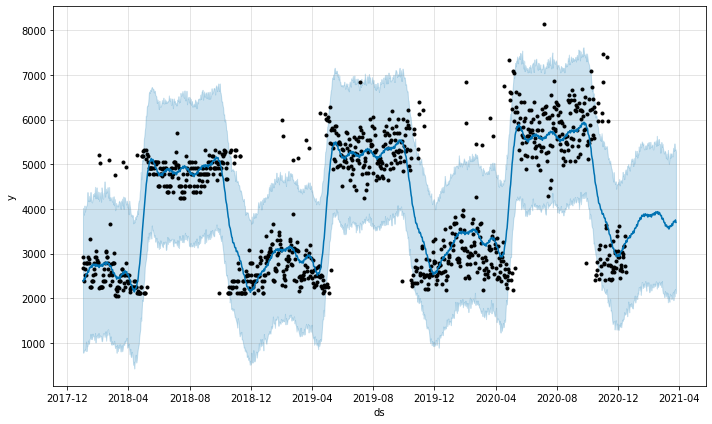

In [21]:
plot1 = mod.plot(forecast)

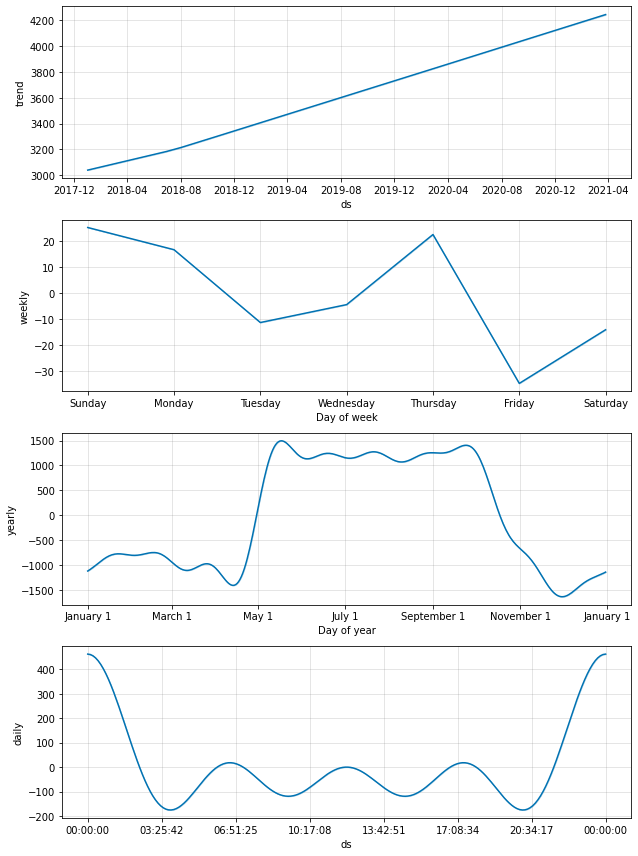

In [22]:
plt2 = mod.plot_components(forecast)

In [23]:
import pickle
with open('saved_model.pkl', "wb") as f:
    pickle.dump(mod, f)